# Exploratory Analysis 

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import os
import sys
import numpy as np

pd.set_option('display.max_columns', 500)

## Load Data

In [2]:
applicationDF = pd.read_csv(os.path.join('.','data','application_train.csv'))

## Basic Exploration

In [3]:
applicationDF.shape

(307511, 122)

In [4]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
applicationDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
applicationDF['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [7]:
applicationDF['TARGET'].value_counts() / applicationDF.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## Clean Data

In [8]:
from tools.modelTools import categoricalColumns, numericalColumns

In [9]:
categoricalColumns = categoricalColumns()
numericalColumns = numericalColumns()

In [10]:
# create matrix of missing values
# only keep the column if it has missing values

numericalColumnsNan = (applicationDF[numericalColumns].isnull() * 1)
numericalColumnsNanList = (numericalColumnsNan.sum(axis=0) > 0)
numericalColumnsNanListFilter = numericalColumnsNanList[numericalColumnsNanList==True].index
numericalColumnsNanListFINAL = numericalColumnsNan[numericalColumnsNanListFilter]

In [11]:
# create matrix of missing values
# only keep the column if it has missing values

categoricalColumnsNan = (applicationDF[categoricalColumns].isnull() * 1)
categoricalColumnsNanList = (categoricalColumnsNan.sum(axis=0) > 0)
categoricalColumnsNanListFilter = categoricalColumnsNanList[categoricalColumnsNanList==True].index
categoricalColumnsNanListFINAL = categoricalColumnsNan[categoricalColumnsNanListFilter]

In [12]:
print(applicationDF[categoricalColumns].shape)
print(numericalColumnsNanListFINAL.shape)
print(categoricalColumnsNanListFINAL.shape)


(307511, 50)
(307511, 61)
(307511, 5)


### Define the quantatative data frame

In [13]:
categoricalDF = pd.concat([applicationDF[categoricalColumns], numericalColumnsNanListFINAL, categoricalColumnsNanListFINAL], axis=1)

In [14]:
targets = applicationDF["TARGET"]

In [15]:
quant_df = pd.concat([applicationDF[numericalColumns], targets], axis=1)

In [16]:
quant_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
print(targets[targets==0].count())
print(targets[targets==1].count())

282686
24825


In [18]:
positive_loans = quant_df[quant_df["TARGET"]==1]
positive_loans.shape[0]

24825

In [19]:
positive_loans = positive_loans.append([positive_loans]*10,ignore_index=True)
positive_loans.shape[0]

273075

In [20]:
negative_loans = quant_df[quant_df["TARGET"]==0]
negative_loans.shape[0]

282686

In [21]:
quant_df = positive_loans.append([negative_loans])

In [22]:
# mix the rows
quant_df = quant_df.sample(frac=1).reset_index(drop=True)

In [23]:
# fill in NaN
quant_df = quant_df.fillna(quant_df.mean())

In [24]:
quant_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,2,157500.0,302206.5,16524.0,229500.0,0.019101,-15009,-7407,-1486.0,-4170,64.000000,4.0,0.452792,0.206843,0.481249,0.11265,0.08563,0.97687,0.74871,0.042505,0.072039,0.146847,0.216732,0.223759,0.065007,0.0973,0.101924,0.008581,0.026942,0.109812,0.085021,0.97619,0.755994,0.040729,0.068117,0.142558,0.212994,0.220156,0.06371,0.102211,0.100824,0.007968,0.025683,0.113074,0.085234,0.976854,0.751995,0.042474,0.071249,0.146348,0.21637,0.223515,0.065781,0.098497,0.103091,0.008455,0.026833,0.09729,3.0,0.0,3.0,0.0,-2000.0,0.00000,0.000000,0.000000,0.0000,0.000000,3.000000,0
1,1,171000.0,846387.0,24876.0,706500.0,0.018029,-12946,-153,-1673.0,-4702,11.000000,3.0,0.452792,0.038000,0.292588,0.14430,0.14310,0.97710,0.68720,0.060200,0.000000,0.241400,0.166700,0.041700,0.029800,0.1168,0.122600,0.003900,0.003000,0.147100,0.148500,0.97720,0.699400,0.060800,0.000000,0.241400,0.166700,0.041700,0.03050,0.127600,0.127700,0.003900,0.003100,0.145700,0.143100,0.977100,0.691400,0.060600,0.000000,0.241400,0.16670,0.041700,0.030300,0.118900,0.124800,0.003900,0.003000,0.09710,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0
2,2,208350.0,816660.0,31644.0,585000.0,0.018634,-13969,-2721,-1666.0,-4293,12.736429,4.0,0.452792,0.463531,0.540654,0.11265,0.08563,0.97687,0.74871,0.042505,0.072039,0.146847,0.216732,0.223759,0.065007,0.0973,0.101924,0.008581,0.026942,0.109812,0.085021,0.97619,0.755994,0.040729,0.068117,0.142558,0.212994,0.220156,0.06371,0.102211,0.100824,0.007968,0.025683,0.113074,0.085234,0.976854,0.751995,0.042474,0.071249,0.146348,0.21637,0.223515,0.065781,0.098497,0.103091,0.008455,0.026833,0.09729,0.0,0.0,0.0,0.0,-1786.0,0.00000,0.000000,0.000000,0.0000,0.000000,2.000000,1
3,0,90000.0,187929.0,14179.5,171000.0,0.046220,-23941,365243,-5370.0,-5369,12.736429,2.0,0.452792,0.708506,0.458336,0.16490,0.08460,0.98860,0.84360,0.024400,0.160000,0.137900,0.375000,0.416700,0.065007,0.1345,0.169700,0.000000,0.000000,0.168100,0.087800,0.98860,0.849700,0.024600,0.161100,0.137900,0.375000,0.416700,0.06371,0.146900,0.176800,0.000000,0.000000,0.166500,0.084600,0.988600,0.845700,0.024500,0.160000,0.137900,0.37500,0.416700,0.065781,0.136800,0.172700,0.000000,0.000000,0.13350,0.0,0.0,0.0,0.0,-1126.0,0.00652,0.007451,0.034605,0.2502,0.263056,1.956089,1
4,0,153000.0,545040.0,26509.5,450000.0,0.020713,-8774,-729,-7823.0,-765,12.736429,2.0,0.378390,0.635124,0.000527,0.09280,0.07180,0.98410,0.78240,0.022600,0.000000,0.206900,0.166700,0.208300,0.000000,0.0756,0.086200,0.000000,0.000000,0.094500,0.074500,0.98410,0.790900,0.022800,0.000000,0.206900,0.166700,0.208300,0.00000,0.082600,0.089900,0.000000,0.000000,0.093700,0.071800,0.984100,0.785300,0.022700,0.000000,0.206900,0.16670,0.208300,0.000000,0.077000,0

In [25]:
quant_df.shape

(555761, 70)

### Train the model

In [26]:
import keras
from keras import layers, utils, optimizers, losses, models, callbacks
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [27]:
# define the validation dataset
validation_set = quant_df.sample(frac=0.2).reset_index(drop=False)
training_set = quant_df.drop(validation_set["index"], axis=0).reset_index(drop=True)
validation_set = validation_set.drop(["index"], axis=1).reset_index(drop=True)

In [28]:
validation_set.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,1,112500.0,490536.0,23989.5,405000.0,0.010032,-15715,-803,-2385.0,-4443,12.736429,2.0,0.551047,0.269226,0.458336,0.11265,0.08563,0.97687,0.74871,0.042505,0.072039,0.146847,0.216732,0.223759,0.065007,0.0973,0.101924,0.008581,0.026942,0.109812,0.085021,0.97619,0.755994,0.040729,0.068117,0.142558,0.212994,0.220156,0.06371,0.102211,0.100824,0.007968,0.025683,0.113074,0.085234,0.976854,0.751995,0.042474,0.071249,0.146348,0.21637,0.223515,0.065781,0.098497,0.103091,0.008455,0.026833,0.09729,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0000,0.000000,1.000000,1
1,0,135000.0,835380.0,33129.0,675000.0,0.020246,-18628,-2111,-8728.0,-2175,12.736429,2.0,0.452792,0.468734,0.276441,0.11265,0.08563,0.97687,0.74871,0.042505,0.072039,0.146847,0.216732,0.223759,0.065007,0.0973,0.101924,0.008581,0.026942,0.109812,0.085021,0.97619,0.755994,0.040729,0.068117,0.142558,0.212994,0.220156,0.06371,0.102211,0.100824,0.007968,0.025683,0.113074,0.085234,0.976854,0.751995,0.042474,0.071249,0.146348,0.21637,0.223515,0.065781,0.098497,0.103091,0.008455,0.026833,0.09729,0.0,0.0,0.0,0.0,-1650.0,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,1
2,0,211500.0,862560.0,25348.5,720000.0,0.011703,-15213,-2830,-5615.0,-4440,16.000000,2.0,0.452792,0.192986,0.458336,0.08040,0.07750,0.98360,0.77560,0.012100,0.000000,0.206900,0.166700,0.208300,0.066300,0.0656,0.077200,0.000000,0.000000,0.081900,0.079300,0.98360,0.784400,0.012100,0.000000,0.206900,0.166700,0.208300,0.06770,0.071600,0.080400,0.000000,0.000000,0.081200,0.077500,0.983600,0.778600,0.012200,0.000000,0.206900,0.16670,0.208300,0.067500,0.066700,0.078600,0.000000,0.000000,0.06720,0.0,0.0,0.0,0.0,-806.0,0.00652,0.007451,0.034605,0.2502,0.263056,1.956089,1
3,1,135000.0,382500.0,19125.0,382500.0,0.004960,-11248,-573,-6848.0,-3775,12.736429,3.0,0.452792,0.699552,0.461482,0.11265,0.08563,0.97687,0.74871,0.042505,0.072039,0.146847,0.216732,0.223759,0.065007,0.0973,0.101924,0.008581,0.026942,0.109812,0.085021,0.97619,0.755994,0.040729,0.068117,0.142558,0.212994,0.220156,0.06371,0.102211,0.100824,0.007968,0.025683,0.113074,0.085234,0.976854,0.751995,0.042474,0.071249,0.146348,0.21637,0.223515,0.065781,0.098497,0.103091,0.008455,0.026833,0.09729,0.0,0.0,0.0,0.0,-183.0,0.00000,0.000000,0.000000,0.0000,0.000000,1.000000,0
4,1,121500.0,298512.0,17266.5,270000.0,0.035792,-15917,-825,-6549.0,-2231,7.000000,3.0,0.452792,0.354225,0.450747,0.04120,0.04090,0.99110,0.87760,0.042505,0.000000,0.103400,0.166700,0.223759,0.000000,0.0336,0.041700,0.000000,0.000000,0.042000,0.042500,0.99110,0.882400,0.040729,0.000000,0.103400,0.166700,0.220156,0.00000,0.036700,0.043400,0.000000,0.000000,0.041600,0.040900,0.991100,0.879200,0.042474,0.000000,0.103400,0.16670,0.223515,0.000000,0.034200,0.0

In [29]:
training_set.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,2,157500.0,302206.5,16524.0,229500.0,0.019101,-15009,-7407,-1486.0,-4170,64.000000,4.0,0.452792,0.206843,0.481249,0.11265,0.08563,0.97687,0.74871,0.042505,0.072039,0.146847,0.216732,0.223759,0.065007,0.0973,0.101924,0.008581,0.026942,0.109812,0.085021,0.97619,0.755994,0.040729,0.068117,0.142558,0.212994,0.220156,0.06371,0.102211,0.100824,0.007968,0.025683,0.113074,0.085234,0.976854,0.751995,0.042474,0.071249,0.146348,0.21637,0.223515,0.065781,0.098497,0.103091,0.008455,0.026833,0.09729,3.0,0.0,3.0,0.0,-2000.0,0.0,0.0,0.0,0.0,0.0,3.0,0
1,2,208350.0,816660.0,31644.0,585000.0,0.018634,-13969,-2721,-1666.0,-4293,12.736429,4.0,0.452792,0.463531,0.540654,0.11265,0.08563,0.97687,0.74871,0.042505,0.072039,0.146847,0.216732,0.223759,0.065007,0.0973,0.101924,0.008581,0.026942,0.109812,0.085021,0.97619,0.755994,0.040729,0.068117,0.142558,0.212994,0.220156,0.06371,0.102211,0.100824,0.007968,0.025683,0.113074,0.085234,0.976854,0.751995,0.042474,0.071249,0.146348,0.21637,0.223515,0.065781,0.098497,0.103091,0.008455,0.026833,0.09729,0.0,0.0,0.0,0.0,-1786.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2,0,153000.0,545040.0,26509.5,450000.0,0.020713,-8774,-729,-7823.0,-765,12.736429,2.0,0.378390,0.635124,0.000527,0.09280,0.07180,0.98410,0.78240,0.022600,0.000000,0.206900,0.166700,0.208300,0.000000,0.0756,0.086200,0.000000,0.000000,0.094500,0.074500,0.98410,0.790900,0.022800,0.000000,0.206900,0.166700,0.208300,0.00000,0.082600,0.089900,0.000000,0.000000,0.093700,0.071800,0.984100,0.785300,0.022700,0.000000,0.206900,0.16670,0.208300,0.000000,0.077000,0.087800,0.000000,0.000000,0.07640,0.0,0.0,0.0,0.0,-428.0,0.0,0.0,0.0,0.0,0.0,6.0,0
3,0,157500.0,760225.5,33615.0,679500.0,0.024610,-19852,-7271,-4419.0,-3313,12.736429,2.0,0.452792,0.667521,0.528093,0.02780,0.05050,0.98610,0.80960,0.000000,0.000000,0.103400,0.083300,0.125000,0.011900,0.0227,0.032600,0.000000,0.047900,0.028400,0.052500,0.98610,0.817100,0.000000,0.000000,0.103400,0.083300,0.125000,0.01220,0.024800,0.033900,0.000000,0.050700,0.028100,0.050500,0.986100,0.812100,0.000000,0.000000,0.103400,0.08330,0.125000,0.012100,0.023100,0.033200,0.000000,0.048900,0.02560,0.0,0.0,0.0,0.0,-588.0,0.0,0.0,0.0,0.0,0.0,2.0,1
4,0,135000.0,1288350.0,37800.0,1125000.0,0.020246,-16089,-4188,-1375.0,-4179,17.000000,2.0,0.452792,0.398794,0.664248,0.07420,0.08460,0.98010,0.72800,0.008600,0.000000,0.137900,0.166700,0.208300,0.057000,0.0588,0.067200,0.007700,0.012600,0.075600,0.087800,0.98010,0.738700,0.008700,0.000000,0.137900,0.166700,0.208300,0.05830,0.064300,0.070000,0.007800,0.013400,0.074900,0.084600,0.980100,0.731600,0.008600,0.000000,0.137900,0.16670,0.208300,0.058000,0.059900,0.068400,0.007800,0.012900,0.06030,0.0,0.0,0.0,0.0,-535.0,0.0,0.0,0.0,2.0,0.0,2.0,1


In [30]:
# setup the training dataset
training_targets = training_set["TARGET"]

# drop the old index from the validation dataset
validation_targets = validation_set["TARGET"]

#drop the target columns
training_set = training_set.drop(["TARGET"], axis=1).reset_index(drop=True)
validation_set = validation_set.drop(["TARGET"], axis=1).reset_index(drop=True)

In [31]:
# get the ndarray out of the dataframe
training_set = training_set.values
validation_set = validation_set.values

In [32]:
# onehot for the targets
training_targets = utils.to_categorical(training_targets)
validation_targets_one_hot = utils.to_categorical(validation_targets)

In [33]:
print(training_set.shape)
print(training_targets.shape)
print(validation_set.shape)
print(validation_targets_one_hot.shape)

(444609, 69)
(444609, 2)
(111152, 69)
(111152, 2)


In [34]:
# normalize the training and validation data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
training_set = min_max_scaler.fit_transform(training_set)
validation_set = min_max_scaler.fit_transform(validation_set)

In [42]:
# define the NN architecture
inputs = layers.Input(shape=(69,), name="inputs")

fc1 = layers.Dense(units=256, activation='relu', name='fc1')(inputs)
fc2 = layers.Dense(units=512, activation='relu', name='fc2')(fc1)
fc3 = layers.Dense(units=512, activation='relu', name='fc3')(fc2)
fc4 = layers.Dense(units=512, activation='relu', name='fc4')(fc3)

outputs = layers.Dense(units=2, activation='softmax', name='outputs')(fc4)
model = models.Model(inputs=[inputs], outputs=[outputs])

In [43]:
# set up the optimizer and the loss function
optimizer = optimizers.Adam(lr=0.0001)
loss = losses.binary_crossentropy
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [44]:
model.compile(loss=loss, metrics=['accuracy'], optimizer=optimizer)
model.fit(x=training_set, y=training_targets, batch_size=128, validation_split=0.1, callbacks=[early_stopping], epochs=100)

Train on 400148 samples, validate on 44461 samples
Epoch 1/100
400148/400148 [==============================] - 37s 93us/step - loss: 0.6102 - acc: 0.6684 - val_loss: 0.6045 - val_acc: 0.6748
Epoch 2/100
400148/400148 [==============================] - 38s 94us/step - loss: 0.6026 - acc: 0.6749 - val_loss: 0.5990 - val_acc: 0.6811
Epoch 3/100
400148/400148 [==============================] - 38s 95us/step - loss: 0.5971 - acc: 0.6789 - val_loss: 0.5938 - val_acc: 0.6836
Epoch 4/100
400148/400148 [==============================] - 39s 97us/step - loss: 0.5901 - acc: 0.6839 - val_loss: 0.5849 - val_acc: 0.6908
Epoch 5/100
400148/400148 [==============================] - 40s 100us/step - loss: 0.5805 - acc: 0.6912 - val_loss: 0.5870 - val_acc: 0.6877
Epoch 6/100
400148/400148 [==============================] - 41s 102us/step - loss: 0.5686 - acc: 0.6994 - val_loss: 0.5703 - val_acc: 0.7015
Epoch 7/100
400148/400148 [==============================] - 42s 106us/step - loss: 0.5533 - acc: 0.7

KeyboardInterrupt: 

In [45]:
loss_, acc_ = model.evaluate(x=validation_set, y=validation_targets_one_hot)

111152/111152 [==============================] - 5s 46us/step


In [46]:
print("Loss: {}, Accuracy: {}".format(loss_, acc_))

Loss: 1.266431934039756, Accuracy: 0.7571883546854757


### AUC 

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_keras = model.predict(validation_set)
fpr, tpr, thresholds = roc_curve(validation_targets, np.argmax(y_pred_keras, axis=1))
print("AUC: {}".format(roc_auc_score(np.argmax(y_pred_keras, axis=1), validation_targets)))

AUC: 0.7639901173958368


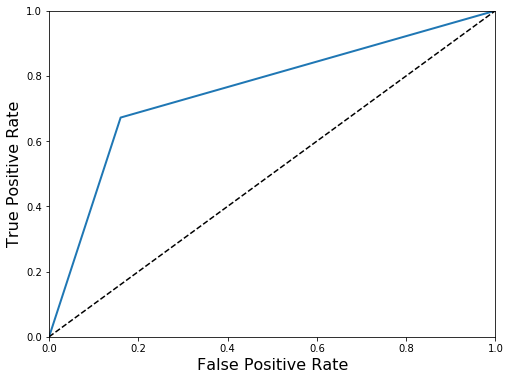

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
# # if you do not want to return a sparse matrix
# # cat_encoder = OneHotEncoder(sparse=False)

# cat_encoder = m.OneHotEncoder()
# cat_1hot = cat_encoder.fit_transform(categoricalDF)

In [ ]:
# num_pipeline = Pipeline([
#         ('imputer', Imputer(strategy="median")),
#         ('std_scaler', StandardScaler()),
#     ])

In [ ]:
# housing_num_tr = num_pipeline.fit_transform(applicationDF[numericalColumns])

## Prepare Data for Modeling

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(applicationDF, test_size=0.2, random_state=42)

X_train = train_set.drop(['SK_ID_CURR','TARGET'], axis=1) # drop labels for training set
y_train = train_set['TARGET'].copy()

X_test = test_set.drop(['SK_ID_CURR','TARGET'], axis=1) # drop labels for training set
y_test = test_set['TARGET'].copy()

In [ ]:
X_train.shape

In [ ]:
%load_ext autoreload

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

%aimport tools.modelTools
%autoreload 1

In [ ]:
num_pipeline = Pipeline([
        ('selector', tools.modelTools.DataFrameSelector(numericalColumns)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', tools.modelTools.DataFrameSelector(categoricalColumns, fillna=True)),
        ('cat_encoder', tools.modelTools.OneHotEncoder(sparse=False)),
    ])

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
X_train.shape

In [ ]:
home_credit_prepared = full_pipeline.fit_transform(X_train)
home_credit_prepared

In [ ]:
home_credit_prepared.shape

## Train Model

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(home_credit_prepared, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, home_credit_prepared, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, home_credit_prepared, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

In [ ]:
y_scores = cross_val_predict(sgd_clf, home_credit_prepared, y_train, cv=3,method="decision_function")

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, home_credit_prepared, y_train, cv=3,method="predict_proba")

In [ ]:
forest_clf.fit(home_credit_prepared, y_train)

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
roc_auc_score(y_train, y_scores_forest)

In [ ]:
y_scores_forest.shape

### Submissions

In [ ]:
submission_data = os.path.join('.','data','application_test.csv')
submission_df = pd.read_csv(submission_data)

submission_X = submission_df.drop('SK_ID_CURR', axis=1) # drop labels for training set
submission_ids = submission_df['SK_ID_CURR'].copy()

In [ ]:
import random

def set_unknown(colVal, setOfValues):
    if colVal in setOfValues:
        return colVal
    return random.choice(list(setOfValues))
    

In [ ]:
# here is how you would use the above function to fill values in the test set
# that are not see in the training set

practice = DataFrame({'col1':['cat','cat','dog','pig'], 'col2':['cat','cat','dog','pig']})
values = set(['cat','dog'])

list(np.vectorize(set_unknown)(practice['col1'], values))

In [ ]:
# apply the column cleaning logic to an entire dataframe

def clean_submission_categories(trainDF, submissionDF, categoricalColumns):
    X_submission_new = {}
    for name, values in submissionDF[categoricalColumns].iteritems():
        uniqueColumnValues = set(trainDF[name])
        currentValues = np.vectorize(set_unknown)(submissionDF[name], uniqueColumnValues)
        X_submission_new[name] = currentValues
    return X_submission_new

In [ ]:
submissionCategoricals = clean_submission_categories(X_train, submission_X, categoricalColumns)

submissionCategoricalsDF = pd.DataFrame.from_dict(submissionCategoricals)

In [ ]:
# check the training data has the same number of columns as the test data

print(f'Train numerical columns: {applicationDF[numericalColumns].shape[1]} columns')
print(f'Train categorical columns: {applicationDF[categoricalColumns].shape[1]} columns')
print(f'Test numerical columns: {submission_df[numericalColumns].shape[1]} columns')
print(f'Test categorical columns: {submissionCategoricalsDF.shape[1]} columns')

In [ ]:
finalSubmissionDF = pd.concat([submission_df[numericalColumns], submissionCategoricalsDF], axis=1)

In [ ]:
submission_prepared = full_pipeline.transform(finalSubmissionDF)

In [ ]:
y_probas_forest = forest_clf.predict_proba(submission_prepared)

In [ ]:
sub

In [ ]:
finalOutput = DataFrame(np.concatenate([submission_ids.values.reshape(-1,1), y_probas_forest[:,1:]], axis=1))

finalOutput.loc[:,0] = finalOutput.loc[:,0].astype(int)

finalOutput.columns=['SK_ID_CURR','TARGET']

In [ ]:
finalOutput.to_csv('submissions/submission.csv', index=False)

In [ ]:
# y_sgd_submission = sgd_clf.predict_proba(submission_prepared)

### Questions

1. How to give a neural network categorical data?

### Playground

In [ ]:
!ls -ltr data/

In [ ]:
bureauBalancePath = os.path.join('.','data', 'bureau_balance.csv')

df = pd.read_csv(bureauBalancePath)

df.head()

In [ ]:
df.STATUS.value_counts()

In [ ]:
bureauBalancePath = os.path.join('.','data', 'bureau.csv')

df = pd.read_csv(bureauBalancePath)

df.head()

### Ideas
1. 